In [1]:
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# 导入数据，分别为输入特征和标签
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

In [3]:
x_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# 随机打乱数据（因为原始数据是顺序的，顺序不打乱会影响准确率）
# seed: 随机数种子，是一个整数，当设置之后，每次生成的随机数都一样
np.random.seed(116)  # 使用相同的seed，保证输入特征和标签一一对应
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

In [6]:
x_data

array([[6.1, 2.8, 4. , 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.8, 2.8, 4.8, 1.4],
       [5.3, 3.7, 1.5, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [6.5, 3. , 5.8, 2.2],
       [7.2, 3.6, 6.1, 2.5],
       [6.3, 3.3, 6. , 2.5],
       [6.7, 3. , 5. , 1.7],
       [4.9, 3.1, 1.5, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.5, 3.2, 5.1, 2. ],
       [5.7, 4.4, 1.5, 0.4],
       [5.9, 3.2, 4.8, 1.8],
       [5.1, 3.3, 1.7, 0.5],
       [5.1, 2.5, 3. , 1.1],
       [4.9, 3.6, 1.4, 0.1],
       [6.2, 2.9, 4.3, 1.3],
       [5.8, 2.8, 5.1, 2.4],
       [6.8, 3.2, 5.9, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [4.9, 3.1, 1.5, 0.1],
       [4.7, 3.2, 1.6, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.2, 4.1, 1.5, 0.1],
       [6.3, 2.5, 4.9, 1.5],
       [5.4, 3. , 4.5, 1.5],
       [6. , 2.2, 4. , 1. ],
       [4.6, 3.2, 1.4, 0.2],
       [6.4, 2.8, 5.6, 2.1],
       [5. , 3.4, 1.5, 0.2],
       [6.7, 3.1, 5.6, 2.4],
       [5.7, 2.6, 3.5, 1. ],
       [7.7, 2.8, 6.7, 2. ],
       [6.9, 3

In [7]:
y_data

array([1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0,
       2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 2, 1])

In [8]:
# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

In [9]:
y_test

array([1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       2, 2, 0, 2, 0, 0, 2, 1])

In [10]:
# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)

In [11]:
x_test

<tf.Tensor: shape=(30, 4), dtype=float32, numpy=
array([[5.7, 2.8, 4.1, 1.3],
       [5.4, 3.7, 1.5, 0.2],
       [5.7, 2.9, 4.2, 1.3],
       [6.6, 2.9, 4.6, 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.6, 2.8, 4.9, 2. ],
       [6.4, 3.2, 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.1, 3. , 4.6, 1.4],
       [5.5, 2.5, 4. , 1.3],
       [5.1, 3.8, 1.9, 0.4],
       [4.8, 3. , 1.4, 0.3],
       [5.1, 3.7, 1.5, 0.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [6.1, 2.8, 4.7, 1.2],
       [4.3, 3. , 1.1, 0.1],
       [5.7, 2.8, 4.5, 1.3],
       [4.4, 2.9, 1.4, 0.2],
       [5.8, 2.7, 3.9, 1.2],
       [6.3, 2.3, 4.4, 1.3],
       [7.3, 2.9, 6.3, 1.8],
       [6.3, 2.7, 4.9, 1.8],
       [4.9, 3. , 1.4, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.1, 3.8, 1.6, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [6.7, 3.3, 5.7, 2.1],
       [5.5, 2.3, 4. , 1.3]], dtype=float32)>

In [12]:
# from_tensor_slices函数使输入特征和标签值一一对应。（把数据集分批次，每个批次batch组数据）
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [14]:
# 生成神经网络的参数，4个输入特征，输入层为4个输入节点；因为3分类，故输出层为3个神经元
# 用tf.Variable()标记参数可训练
# 使用seed使每次生成的随机数相同
w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

In [15]:
w1

<tf.Variable 'Variable:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.08249953, -0.0683137 ,  0.19668601],
       [-0.05480815,  0.04570521,  0.1357149 ],
       [ 0.07750896, -0.16734955, -0.10294553],
       [ 0.15784004, -0.13311003,  0.06045313]], dtype=float32)>

In [16]:
b1

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([-0.09194934, -0.12376948, -0.05381497], dtype=float32)>

In [17]:
lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

In [20]:
for step, (x_train, y_train) in enumerate(train_db):
    print(step)
    print(x_train)
    print(y_train)
    print("-----------")

0
tf.Tensor(
[[6.1 2.8 4.  1.3]
 [6.3 3.3 4.7 1.6]
 [6.8 2.8 4.8 1.4]
 [5.3 3.7 1.5 0.2]
 [5.4 3.4 1.7 0.2]
 [6.5 3.  5.8 2.2]
 [7.2 3.6 6.1 2.5]
 [6.3 3.3 6.  2.5]
 [6.7 3.  5.  1.7]
 [4.9 3.1 1.5 0.2]
 [5.4 3.9 1.7 0.4]
 [6.5 3.2 5.1 2. ]
 [5.7 4.4 1.5 0.4]
 [5.9 3.2 4.8 1.8]
 [5.1 3.3 1.7 0.5]
 [5.1 2.5 3.  1.1]
 [4.9 3.6 1.4 0.1]
 [6.2 2.9 4.3 1.3]
 [5.8 2.8 5.1 2.4]
 [6.8 3.2 5.9 2.3]
 [6.2 2.2 4.5 1.5]
 [4.9 3.1 1.5 0.1]
 [4.7 3.2 1.6 0.2]
 [4.6 3.4 1.4 0.3]
 [5.2 4.1 1.5 0.1]
 [6.3 2.5 4.9 1.5]
 [5.4 3.  4.5 1.5]
 [6.  2.2 4.  1. ]
 [4.6 3.2 1.4 0.2]
 [6.4 2.8 5.6 2.1]
 [5.  3.4 1.5 0.2]
 [6.7 3.1 5.6 2.4]], shape=(32, 4), dtype=float32)
tf.Tensor([1 1 1 0 0 2 2 2 1 0 0 2 0 1 0 1 0 1 2 2 1 0 0 0 0 1 1 1 0 2 0 2], shape=(32,), dtype=int64)
-----------
1
tf.Tensor(
[[5.7 2.6 3.5 1. ]
 [7.7 2.8 6.7 2. ]
 [6.9 3.1 5.4 2.1]
 [4.9 2.5 4.5 1.7]
 [5.4 3.4 1.5 0.4]
 [6.3 2.9 5.6 1.8]
 [7.7 3.8 6.7 2.2]
 [6.9 3.1 4.9 1.5]
 [5.1 3.5 1.4 0.2]
 [6.3 2.8 5.1 1.5]
 [6.4 3.2 5.3 2.3]
 [6.1 3.  

In [21]:
# 训练部分
for epoch in range(epoch):  # 数据集级别的循环，每个epoch循环一次数据集
    for step, (x_train, y_train) in enumerate(train_db):  # batch级别的循环 ，每个step循环一个batch
        with tf.GradientTape() as tape:  # with结构记录梯度信息
            y = tf.matmul(x_train, w1) + b1  # 神经网络乘加运算
            y = tf.nn.softmax(y)  # 使输出y符合概率分布（此操作后与独热码同量级，可相减求loss）
            y_ = tf.one_hot(y_train, depth=3)  # 将标签值转换为独热码格式，方便计算loss和accuracy
            loss = tf.reduce_mean(tf.square(y_ - y))  # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_all += loss.numpy()  # 将每个step计算出的loss累加，为后续求loss平均值提供数据，这样计算的loss更准确
        # 计算loss对各个参数的梯度
        grads = tape.gradient(loss, [w1, b1])

        # 实现梯度更新 w1 = w1 - lr * w1_grad    b = b - lr * b_grad
        w1.assign_sub(lr * grads[0])  # 参数w1自更新
        b1.assign_sub(lr * grads[1])  # 参数b自更新

    # 每个epoch，打印loss信息
    print("Epoch {}, loss: {}".format(epoch, loss_all / 4))
    train_loss_results.append(loss_all / 4)  # 将4个step的loss求平均记录在此变量中
    loss_all = 0  # loss_all归零，为记录下一个epoch的loss做准备

    # 测试部分
    # total_correct为预测对的样本个数, total_number为测试的总样本数，将这两个变量都初始化为0
    total_correct, total_number = 0, 0
    for x_test, y_test in test_db:
        # 使用更新后的参数进行预测
        y = tf.matmul(x_test, w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y, axis=1)  # 返回y中最大值的索引，即预测的分类
        # 将pred转换为y_test的数据类型
        pred = tf.cast(pred, dtype=y_test.dtype)
        # 若分类正确，则correct=1，否则为0，将bool型的结果转换为int型
        correct = tf.cast(tf.equal(pred, y_test), dtype=tf.int32)
        # 将每个batch的correct数加起来
        correct = tf.reduce_sum(correct)
        # 将所有batch中的correct数加起来
        total_correct += int(correct)
        # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    # 总的准确率等于total_correct/total_number
    acc = total_correct / total_number
    test_acc.append(acc)
    print("Test_acc:", acc)
    print("--------------------------")


Epoch 0, loss: 0.2821310982108116
Test_acc: 0.16666666666666666
--------------------------
Epoch 1, loss: 0.25459614023566246
Test_acc: 0.16666666666666666
--------------------------
Epoch 2, loss: 0.22570249810814857
Test_acc: 0.16666666666666666
--------------------------
Epoch 3, loss: 0.21028400212526321
Test_acc: 0.16666666666666666
--------------------------
Epoch 4, loss: 0.19942264631390572
Test_acc: 0.16666666666666666
--------------------------
Epoch 5, loss: 0.18873637914657593
Test_acc: 0.5
--------------------------
Epoch 6, loss: 0.17851299792528152
Test_acc: 0.5333333333333333
--------------------------
Epoch 7, loss: 0.16922875866293907
Test_acc: 0.5333333333333333
--------------------------
Epoch 8, loss: 0.16107672825455666
Test_acc: 0.5333333333333333
--------------------------
Epoch 9, loss: 0.15404684841632843
Test_acc: 0.5333333333333333
--------------------------
Epoch 10, loss: 0.14802726358175278
Test_acc: 0.5333333333333333
--------------------------
Epoch 11,

Epoch 95, loss: 0.07106082420796156
Test_acc: 0.8
--------------------------
Epoch 96, loss: 0.07072804123163223
Test_acc: 0.8
--------------------------
Epoch 97, loss: 0.0703988391906023
Test_acc: 0.8
--------------------------
Epoch 98, loss: 0.07007317896932364
Test_acc: 0.8333333333333334
--------------------------
Epoch 99, loss: 0.0697510140016675
Test_acc: 0.8666666666666667
--------------------------
Epoch 100, loss: 0.06943229772150517
Test_acc: 0.8666666666666667
--------------------------
Epoch 101, loss: 0.06911697331815958
Test_acc: 0.8666666666666667
--------------------------
Epoch 102, loss: 0.06880500633269548
Test_acc: 0.8666666666666667
--------------------------
Epoch 103, loss: 0.06849635764956474
Test_acc: 0.8666666666666667
--------------------------
Epoch 104, loss: 0.06819095928221941
Test_acc: 0.8666666666666667
--------------------------
Epoch 105, loss: 0.06788879912346601
Test_acc: 0.8666666666666667
--------------------------
Epoch 106, loss: 0.0675898231

Epoch 198, loss: 0.04954243544489145
Test_acc: 1.0
--------------------------
Epoch 199, loss: 0.049416122026741505
Test_acc: 1.0
--------------------------
Epoch 200, loss: 0.04929081164300442
Test_acc: 1.0
--------------------------
Epoch 201, loss: 0.0491664819419384
Test_acc: 1.0
--------------------------
Epoch 202, loss: 0.049043127335608006
Test_acc: 1.0
--------------------------
Epoch 203, loss: 0.04892073664814234
Test_acc: 1.0
--------------------------
Epoch 204, loss: 0.04879930429160595
Test_acc: 1.0
--------------------------
Epoch 205, loss: 0.048678803257644176
Test_acc: 1.0
--------------------------
Epoch 206, loss: 0.04855924565345049
Test_acc: 1.0
--------------------------
Epoch 207, loss: 0.0484406054019928
Test_acc: 1.0
--------------------------
Epoch 208, loss: 0.048322876915335655
Test_acc: 1.0
--------------------------
Epoch 209, loss: 0.04820605181157589
Test_acc: 1.0
--------------------------
Epoch 210, loss: 0.048090120777487755
Test_acc: 1.0
----------

Epoch 353, loss: 0.03744320385158062
Test_acc: 1.0
--------------------------
Epoch 354, loss: 0.03739539673551917
Test_acc: 1.0
--------------------------
Epoch 355, loss: 0.03734782664105296
Test_acc: 1.0
--------------------------
Epoch 356, loss: 0.037300480995327234
Test_acc: 1.0
--------------------------
Epoch 357, loss: 0.037253372836858034
Test_acc: 1.0
--------------------------
Epoch 358, loss: 0.03720649890601635
Test_acc: 1.0
--------------------------
Epoch 359, loss: 0.03715985035523772
Test_acc: 1.0
--------------------------
Epoch 360, loss: 0.03711343789473176
Test_acc: 1.0
--------------------------
Epoch 361, loss: 0.03706724150106311
Test_acc: 1.0
--------------------------
Epoch 362, loss: 0.03702127328142524
Test_acc: 1.0
--------------------------
Epoch 363, loss: 0.036975526716560125
Test_acc: 1.0
--------------------------
Epoch 364, loss: 0.03693001065403223
Test_acc: 1.0
--------------------------
Epoch 365, loss: 0.036884700413793325
Test_acc: 1.0
---------

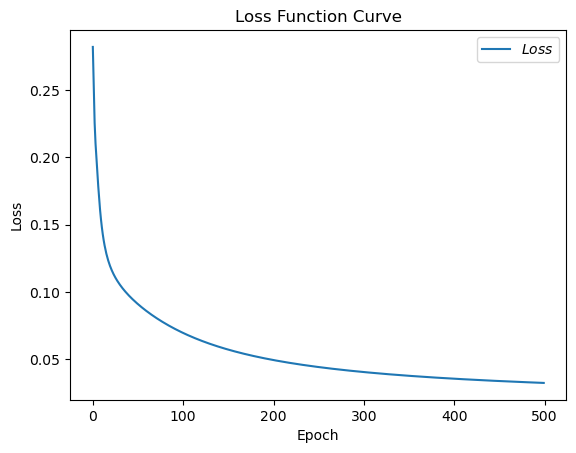

In [22]:
# 绘制 loss 曲线
plt.title('Loss Function Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Loss')  # y轴变量名称
plt.plot(train_loss_results, label="$Loss$")  # 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend()  # 画出曲线图标
plt.show()  # 画出图像

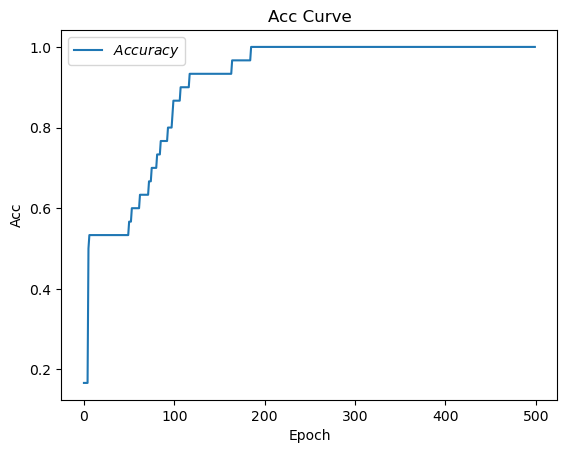

In [23]:
# 绘制 Accuracy 曲线
plt.title('Acc Curve')  # 图片标题
plt.xlabel('Epoch')  # x轴变量名称
plt.ylabel('Acc')  # y轴变量名称
plt.plot(test_acc, label="$Accuracy$")  # 逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()